In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# Band2 Video

# folder_name = "ablation/kpcull"
folder_name = "output/nocull"
path = f"/datassd/pipeline/server_tiled/pipeline_new/{folder_name}/"
sender_file = os.path.join(path, "0_start_frame_sender_timestamp.txt")
receiver_file = os.path.join(path, "0_end_frame_recveiver_timestamp.txt")

load_frame_file = os.path.join(path, "0_load_frame_sender_latency.txt")
update_view_file = os.path.join(path, "0_update_view_sender_latency.txt")
send_frame_file = os.path.join(path, "0_send_frame_sender_latency.txt")

load_frame_process_file = os.path.join(path, "0_load_frame_sender_processing_time.txt")
update_view_process_file = os.path.join(
    path, "0_update_view_sender_processing_time.txt"
)
send_frame_process_file = os.path.join(path, "0_send_frame_sender_processing_time.txt")

recv_frame_file = os.path.join(path, "0_recv_frame_receiver_latency.txt")
update_ptcl_file = os.path.join(path, "0_update_ptcl_receiver_latency.txt")
render_ptcl_file = os.path.join(path, "0_render_ptcl_receiver_latency.txt")

recv_frame_process_file = os.path.join(
    path, "0_recv_frame_receiver_processing_time.txt"
)
update_ptcl_process_file = os.path.join(
    path, "0_update_ptcl_receiver_processing_time.txt"
)
render_ptcl_process_file = os.path.join(
    path, "0_render_ptcl_receiver_processing_time.txt"
)

webrtc_color_sender_file = os.path.join(path, "0_c_webrtc_sender_timestamp.txt")
webrtc_color_receiver_file = os.path.join(path, "0_c_webrtc_receiver_timestamp.txt")
webrtc_depth_sender_file = os.path.join(path, "0_d_yuv16_webrtc_sender_timestamp.txt")
webrtc_depth_receiver_file = os.path.join(
    path, "0_d_yuv16_webrtc_receiver_timestamp.txt"
)

send_df = pd.read_csv(sender_file)
recv_df = pd.read_csv(receiver_file)

load_frame_df = pd.read_csv(load_frame_file)
update_view_df = pd.read_csv(update_view_file)
send_frame_df = pd.read_csv(send_frame_file)

recv_frame_df = pd.read_csv(recv_frame_file)
update_ptcl_df = pd.read_csv(update_ptcl_file)
render_ptcl_df = pd.read_csv(render_ptcl_file)

load_frame_process_df = pd.read_csv(load_frame_process_file)
update_view_process_df = pd.read_csv(update_view_process_file)
send_frame_process_df = pd.read_csv(send_frame_process_file)

recv_frame_process_df = pd.read_csv(recv_frame_process_file)
update_ptcl_process_df = pd.read_csv(update_ptcl_process_file)
render_ptcl_process_df = pd.read_csv(render_ptcl_process_file)

webrtc_color_sender_df = pd.read_csv(webrtc_color_sender_file)
webrtc_depth_sender_df = pd.read_csv(webrtc_depth_sender_file)
webrtc_color_receiver_df = pd.read_csv(webrtc_color_receiver_file)
webrtc_depth_receiver_df = pd.read_csv(webrtc_depth_receiver_file)

EmptyDataError: No columns to parse from file

In [3]:
merged_e2e_df = pd.merge(send_df, recv_df, on="FrameID")

# Rename columns
merged_e2e_df.columns = ["FrameID", "SenderTimestamp", "ReceiverTimestamp"]
merged_e2e_df["E2ELatency"] = (
    merged_e2e_df["ReceiverTimestamp"] - merged_e2e_df["SenderTimestamp"]
)

merged_sender_stages_df = pd.merge(load_frame_df, update_view_df, on="FrameID")
merged_sender_stages_df.columns = ["FrameID", "LoadFrameTime", "UpdateViewTime"]

merged_sender_stages_df = pd.merge(merged_sender_stages_df, send_frame_df, on="FrameID")
merged_sender_stages_df.columns = [
    "FrameID",
    "LoadFrameTime",
    "UpdateViewTime",
    "SendFrameTime",
]

merged_receiver_stages_df = pd.merge(recv_frame_df, update_ptcl_df, on="FrameID")
merged_receiver_stages_df.columns = ["FrameID", "RecvFrameTime", "UpdatePtclTime"]

merged_receiver_stages_df = pd.merge(
    merged_receiver_stages_df, render_ptcl_df, on="FrameID"
)
merged_receiver_stages_df.columns = [
    "FrameID",
    "RecvFrameTime",
    "UpdatePtclTime",
    "RenderPtclTime",
]

merged_stages_df = pd.merge(
    merged_sender_stages_df, merged_receiver_stages_df, on="FrameID"
)

merged_sender_process_df = pd.merge(
    load_frame_process_df, update_view_process_df, on="FrameID"
)
merged_sender_process_df.columns = [
    "FrameID",
    "LoadFrameProcessTime",
    "UpdateViewProcessTime",
]

merged_sender_process_df = pd.merge(
    merged_sender_process_df, send_frame_process_df, on="FrameID"
)
merged_sender_process_df.columns = [
    "FrameID",
    "LoadFrameProcessTime",
    "UpdateViewProcessTime",
    "SendFrameProcessTime",
]

merged_receiver_process_df = pd.merge(
    recv_frame_process_df, update_ptcl_process_df, on="FrameID"
)
merged_receiver_process_df.columns = [
    "FrameID",
    "RecvFrameProcessTime",
    "UpdatePtclProcessTime",
]

merged_receiver_process_df = pd.merge(
    merged_receiver_process_df, render_ptcl_process_df, on="FrameID"
)
merged_receiver_process_df.columns = [
    "FrameID",
    "RecvFrameProcessTime",
    "UpdatePtclProcessTime",
    "RenderPtclProcessTime",
]

merged_webrtc_df = pd.merge(
    webrtc_color_sender_df, webrtc_color_receiver_df, on="FrameID"
)
merged_webrtc_df.columns = ["FrameID", "ColorSenderTimestamp", "ColorReceiverTimestamp"]
merged_webrtc_df["ColorWebRTCLatency"] = (
    merged_webrtc_df["ColorReceiverTimestamp"]
    - merged_webrtc_df["ColorSenderTimestamp"]
)

merged_webrtc_df = pd.merge(merged_webrtc_df, webrtc_depth_sender_df, on="FrameID")
merged_webrtc_df.columns = [
    "FrameID",
    "ColorSenderTimestamp",
    "ColorReceiverTimestamp",
    "ColorWebRTCLatency",
    "DepthSenderTimestamp",
]
merged_webrtc_df = pd.merge(merged_webrtc_df, webrtc_depth_receiver_df, on="FrameID")
merged_webrtc_df.columns = [
    "FrameID",
    "ColorSenderTimestamp",
    "ColorReceiverTimestamp",
    "ColorWebRTCLatency",
    "DepthSenderTimestamp",
    "DepthReceiverTimestamp",
]
merged_webrtc_df["DepthWebRTCLatency"] = (
    merged_webrtc_df["DepthReceiverTimestamp"]
    - merged_webrtc_df["DepthSenderTimestamp"]
)

OFFSET = 500  # First 500 frames

In [4]:
merged_receiver_stages_df

,FrameID,RecvFrameTime,UpdatePtclTime,RenderPtclTime
0,2,1101,1136,1145
1,3,15,31,30
2,4,15,30,29
3,5,28,17,24
4,6,31,15,18
...,...,...,...,...
5276,5285,34,35,33
5277,5286,39,39,40
5278,5287,28,30,30
5279,5288,34,33,31


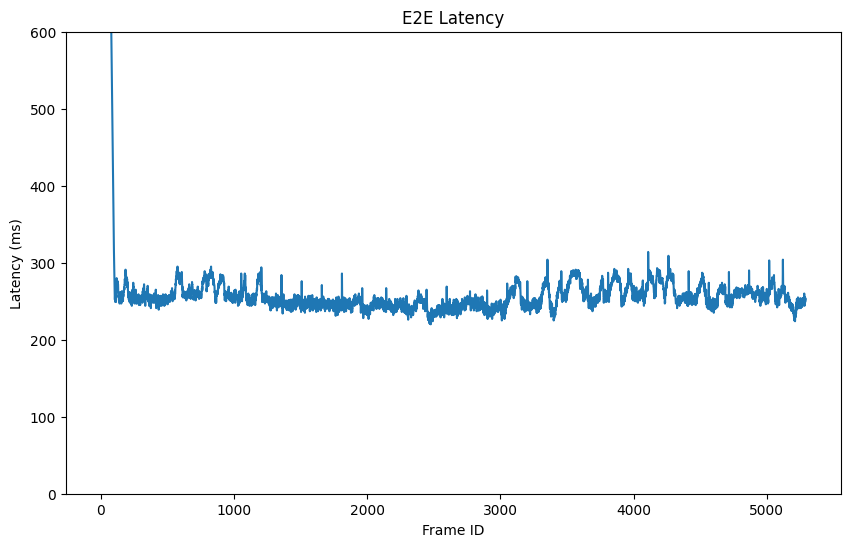

Avg. E2E Latency:  254.74398661367914


,FrameID,SenderTimestamp,ReceiverTimestamp,E2ELatency
500,506,1730193987338,1730193987590,252
501,507,1730193987371,1730193987621,250
502,508,1730193987404,1730193987661,257
503,509,1730193987438,1730193987695,257
504,510,1730193987472,1730193987726,254
...,...,...,...,...
5276,5285,1730194145342,1730194145590,248
5277,5286,1730194145375,1730194145630,255
5278,5287,1730194145410,1730194145661,251
5279,5288,1730194145439,1730194145693,254


In [5]:
# Plot E2E latency
plt.figure(figsize=(10, 6))
plt.plot(merged_e2e_df["FrameID"], merged_e2e_df["E2ELatency"], label="E2E Latency")
plt.title("E2E Latency")
plt.ylabel("Latency (ms)")
plt.xlabel("Frame ID")
plt.ylim(0, 600)
plt.show()

# Print avg. E2E latency, skip first 10 frames
# merged_e2e_df = merged_e2e_df[10:]
print("Avg. E2E Latency: ", np.mean(merged_e2e_df[OFFSET:]["E2ELatency"]))

merged_e2e_df[OFFSET:]

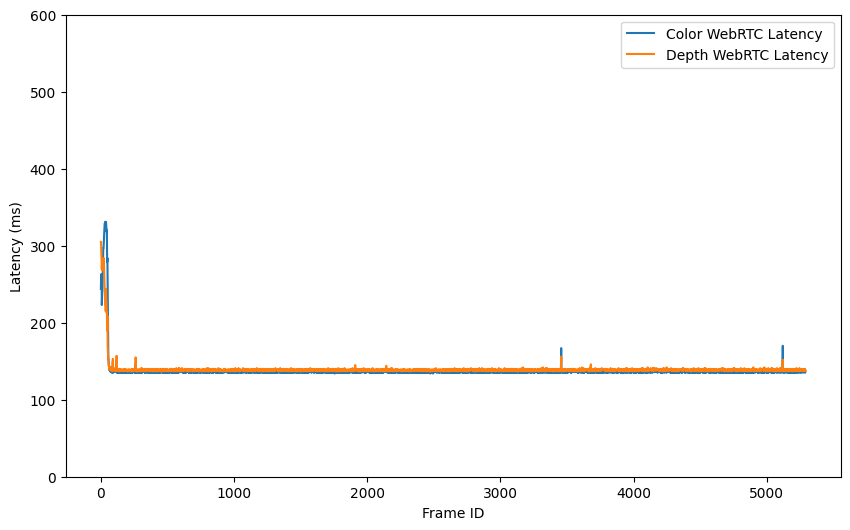

Avg. Color WebRTC Latency:  136.09535759096613
Avg. Depth WebRTC Latency:  138.66373902132997


,FrameID,ColorSenderTimestamp,ColorReceiverTimestamp,ColorWebRTCLatency,DepthSenderTimestamp,DepthReceiverTimestamp,DepthWebRTCLatency
0,2,1730193971884,1730193972128,244,1730193971837,1730193972142,305
1,3,1730193971893,1730193972151,258,1730193971847,1730193972152,305
2,4,1730193971902,1730193972164,262,1730193971857,1730193972157,300
3,5,1730193971911,1730193972174,263,1730193971868,1730193972162,294
4,6,1730193971927,1730193972186,259,1730193971879,1730193972166,287
...,...,...,...,...,...,...,...
5277,5286,1730194145454,1730194145591,137,1730194145454,1730194145594,140
5278,5287,1730194145483,1730194145618,135,1730194145489,1730194145627,138
5279,5288,1730194145516,1730194145652,136,1730194145518,1730194145657,139
5280,5289,1730194145550,1730194145686,136,1730194145547,1730194145686,139


In [6]:
# Plot WebRTC latency
plt.figure(figsize=(10, 6))
plt.plot(
    merged_webrtc_df["FrameID"],
    merged_webrtc_df["ColorWebRTCLatency"],
    label="Color WebRTC Latency",
)
plt.plot(
    merged_webrtc_df["FrameID"],
    merged_webrtc_df["DepthWebRTCLatency"],
    label="Depth WebRTC Latency",
)
plt.ylabel("Latency (ms)")
plt.xlabel("Frame ID")
plt.ylim(0, 600)
plt.legend()
plt.show()

# Print avg. WebRTC latency, skip first OFFSET frames
print(
    "Avg. Color WebRTC Latency: ",
    np.mean(merged_webrtc_df[OFFSET:]["ColorWebRTCLatency"]),
)
print(
    "Avg. Depth WebRTC Latency: ",
    np.mean(merged_webrtc_df[OFFSET:]["DepthWebRTCLatency"]),
)

merged_webrtc_df

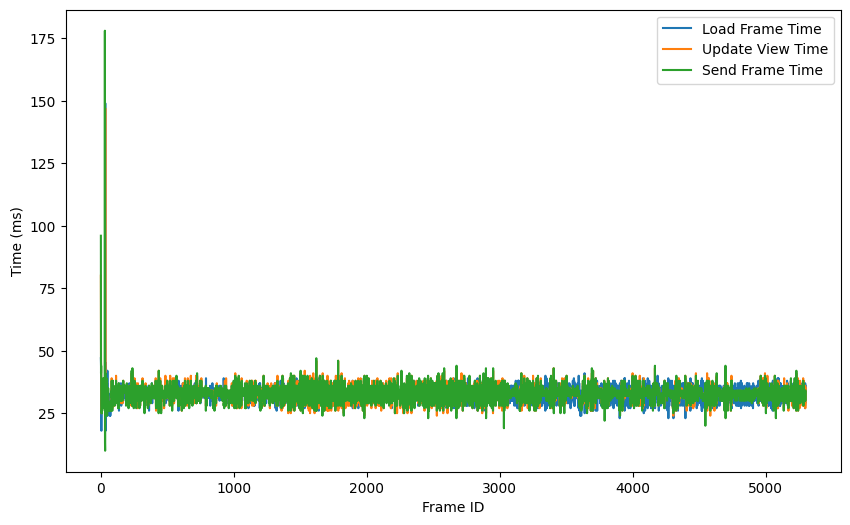

,FrameID,LoadFrameTime,UpdateViewTime,SendFrameTime
0,2,47,80,96
1,3,45,47,41
2,4,42,42,44
3,5,19,29,28
4,6,18,25,26
...,...,...,...,...
5291,5293,33,34,34
5292,5294,27,28,30
5293,5295,37,36,34
5294,5296,29,27,30


In [7]:
# Plot sender stages
plt.figure(figsize=(10, 6))
plt.plot(
    merged_sender_stages_df["FrameID"],
    merged_sender_stages_df["LoadFrameTime"],
    label="Load Frame Time",
)
plt.plot(
    merged_sender_stages_df["FrameID"],
    merged_sender_stages_df["UpdateViewTime"],
    label="Update View Time",
)
plt.plot(
    merged_sender_stages_df["FrameID"],
    merged_sender_stages_df["SendFrameTime"],
    label="Send Frame Time",
)
plt.ylabel("Time (ms)")
plt.xlabel("Frame ID")
plt.legend()
plt.show()

merged_sender_stages_df

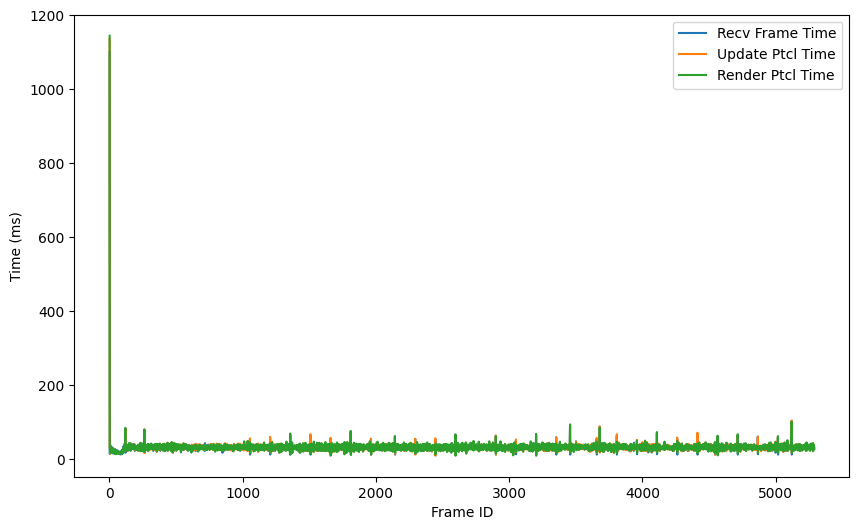

,FrameID,RecvFrameTime,UpdatePtclTime,RenderPtclTime
0,2,1101,1136,1145
1,3,15,31,30
2,4,15,30,29
3,5,28,17,24
4,6,31,15,18
...,...,...,...,...
5276,5285,34,35,33
5277,5286,39,39,40
5278,5287,28,30,30
5279,5288,34,33,31


In [8]:
# Plot receiver stages
plt.figure(figsize=(10, 6))
plt.plot(
    merged_receiver_stages_df["FrameID"],
    merged_receiver_stages_df["RecvFrameTime"],
    label="Recv Frame Time",
)
plt.plot(
    merged_receiver_stages_df["FrameID"],
    merged_receiver_stages_df["UpdatePtclTime"],
    label="Update Ptcl Time",
)
plt.plot(
    merged_receiver_stages_df["FrameID"],
    merged_receiver_stages_df["RenderPtclTime"],
    label="Render Ptcl Time",
)
plt.ylabel("Time (ms)")
plt.xlabel("Frame ID")
plt.legend()
plt.show()

merged_receiver_stages_df

In [9]:
merged_stages_df

,FrameID,LoadFrameTime,UpdateViewTime,SendFrameTime,RecvFrameTime,UpdatePtclTime,RenderPtclTime
0,2,47,80,96,1101,1136,1145
1,3,45,47,41,15,31,30
2,4,42,42,44,15,30,29
3,5,19,29,28,28,17,24
4,6,18,25,26,31,15,18
...,...,...,...,...,...,...,...
5276,5285,33,36,36,34,35,33
5277,5286,34,34,34,39,39,40
5278,5287,29,31,32,28,30,30
5279,5288,34,31,30,34,33,31


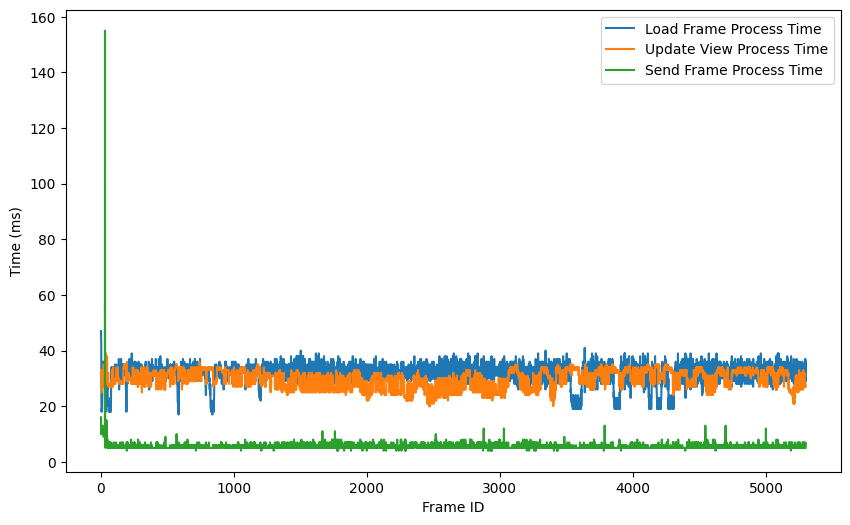

,FrameID,LoadFrameProcessTime,UpdateViewProcessTime,SendFrameProcessTime
0,2,47,32,16
1,3,45,32,10
2,4,42,33,11
3,5,19,29,10
4,6,18,25,11
...,...,...,...,...
5291,5293,33,28,5
5292,5294,27,28,6
5293,5295,37,28,6
5294,5296,29,27,7


In [10]:
# Plot sender processing time
plt.figure(figsize=(10, 6))
plt.plot(
    merged_sender_process_df["FrameID"],
    merged_sender_process_df["LoadFrameProcessTime"],
    label="Load Frame Process Time",
)
plt.plot(
    merged_sender_process_df["FrameID"],
    merged_sender_process_df["UpdateViewProcessTime"],
    label="Update View Process Time",
)
plt.plot(
    merged_sender_process_df["FrameID"],
    merged_sender_process_df["SendFrameProcessTime"],
    label="Send Frame Process Time",
)
plt.ylabel("Time (ms)")
plt.xlabel("Frame ID")
plt.legend()
plt.show()

merged_sender_process_df

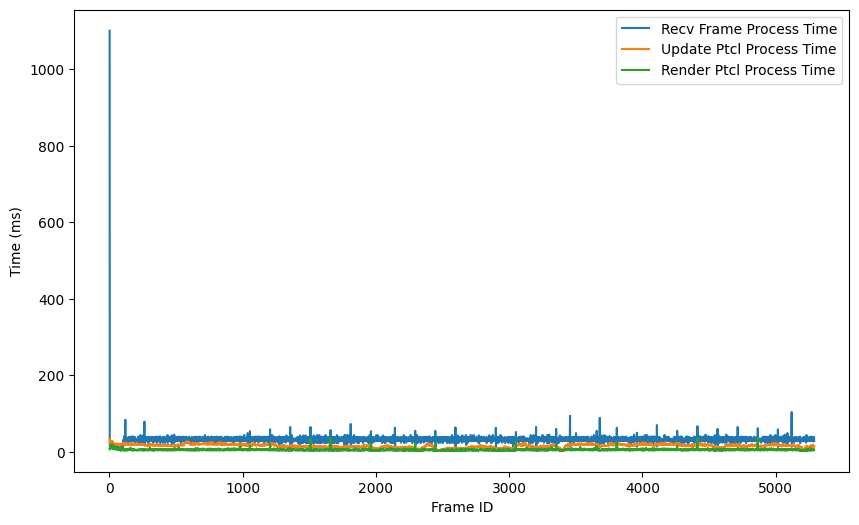

,FrameID,RecvFrameTime,UpdatePtclTime,RenderPtclTime
0,2,1101,1136,1145
1,3,15,31,30
2,4,15,30,29
3,5,28,17,24
4,6,31,15,18
...,...,...,...,...
5276,5285,34,35,33
5277,5286,39,39,40
5278,5287,28,30,30
5279,5288,34,33,31


In [11]:
# Plot receiver processing time
plt.figure(figsize=(10, 6))
plt.plot(
    merged_receiver_process_df["FrameID"],
    merged_receiver_process_df["RecvFrameProcessTime"],
    label="Recv Frame Process Time",
)
plt.plot(
    merged_receiver_process_df["FrameID"],
    merged_receiver_process_df["UpdatePtclProcessTime"],
    label="Update Ptcl Process Time",
)
plt.plot(
    merged_receiver_process_df["FrameID"],
    merged_receiver_process_df["RenderPtclProcessTime"],
    label="Render Ptcl Process Time",
)
plt.ylabel("Time (ms)")
plt.xlabel("Frame ID")
plt.legend()
plt.show()

merged_receiver_stages_df

In [12]:
merged_webrtc_df

,FrameID,ColorSenderTimestamp,ColorReceiverTimestamp,ColorWebRTCLatency,DepthSenderTimestamp,DepthReceiverTimestamp,DepthWebRTCLatency
0,2,1730193971884,1730193972128,244,1730193971837,1730193972142,305
1,3,1730193971893,1730193972151,258,1730193971847,1730193972152,305
2,4,1730193971902,1730193972164,262,1730193971857,1730193972157,300
3,5,1730193971911,1730193972174,263,1730193971868,1730193972162,294
4,6,1730193971927,1730193972186,259,1730193971879,1730193972166,287
...,...,...,...,...,...,...,...
5277,5286,1730194145454,1730194145591,137,1730194145454,1730194145594,140
5278,5287,1730194145483,1730194145618,135,1730194145489,1730194145627,138
5279,5288,1730194145516,1730194145652,136,1730194145518,1730194145657,139
5280,5289,1730194145550,1730194145686,136,1730194145547,1730194145686,139


In [13]:
merged_sender_process_df

,FrameID,LoadFrameProcessTime,UpdateViewProcessTime,SendFrameProcessTime
0,2,47,32,16
1,3,45,32,10
2,4,42,33,11
3,5,19,29,10
4,6,18,25,11
...,...,...,...,...
5291,5293,33,28,5
5292,5294,27,28,6
5293,5295,37,28,6
5294,5296,29,27,7


In [14]:
# Ignore the first few frames

merged_sender_stages_df = merged_sender_stages_df[OFFSET:]
merged_receiver_stages_df = merged_receiver_stages_df[OFFSET:]
merged_sender_process_df = merged_sender_process_df[OFFSET:]
merged_receiver_process_df = merged_receiver_process_df[OFFSET:]
merged_webrtc_df = merged_webrtc_df[OFFSET:]
merged_e2e_df = merged_e2e_df[OFFSET:]

print("Mean E2E Latency: ", merged_e2e_df["E2ELatency"].mean())
print("Mean Color WebRTC Latency: ", merged_webrtc_df["ColorWebRTCLatency"].mean())
print("Mean Depth WebRTC Latency: ", merged_webrtc_df["DepthWebRTCLatency"].mean())

print("Mean Load Frame Time: ", merged_sender_stages_df["LoadFrameTime"].mean())
print("Mean Update View Time: ", merged_sender_stages_df["UpdateViewTime"].mean())
print("Mean Send Frame Time: ", merged_sender_stages_df["SendFrameTime"].mean())

print("Mean Recv Frame Time: ", merged_receiver_stages_df["RecvFrameTime"].mean())
print("Mean Update Ptcl Time: ", merged_receiver_stages_df["UpdatePtclTime"].mean())
print("Mean Render Ptcl Time: ", merged_receiver_stages_df["RenderPtclTime"].mean())

total_latency = (
    merged_sender_stages_df["LoadFrameTime"]
    + merged_sender_stages_df["UpdateViewTime"]
    + merged_sender_stages_df["SendFrameTime"]
    + merged_receiver_stages_df["RecvFrameTime"]
    + merged_receiver_stages_df["UpdatePtclTime"]
    + merged_receiver_stages_df["RenderPtclTime"]
    + merged_webrtc_df["ColorWebRTCLatency"] / 2.0
    + merged_webrtc_df["DepthWebRTCLatency"] / 2.0
)

print("Mean Total Latency: ", total_latency.mean(), "std: ", total_latency.std())

print("-----------------------------------------------------------\n")

print(
    f"Load Frame Process Time: Mean = {merged_sender_process_df['LoadFrameProcessTime'].mean():.2f}, Std = {merged_sender_process_df['LoadFrameProcessTime'].std():.2f}"
)
print(
    f"Update View Process Time: Mean = {merged_sender_process_df['UpdateViewProcessTime'].mean():.2f}, Std = {merged_sender_process_df['UpdateViewProcessTime'].std():.2f}"
)
print(
    f"Send Frame Process Time: Mean = {merged_sender_process_df['SendFrameProcessTime'].mean():.2f}, Std = {merged_sender_process_df['SendFrameProcessTime'].std():.2f}"
)

print(
    f"Recv Frame Process Time: Mean = {merged_receiver_process_df['RecvFrameProcessTime'].mean():.2f}, Std = {merged_receiver_process_df['RecvFrameProcessTime'].std():.2f}"
)
print(
    f"Update Ptcl Process Time: Mean = {merged_receiver_process_df['UpdatePtclProcessTime'].mean():.2f}, Std = {merged_receiver_process_df['UpdatePtclProcessTime'].std():.2f}"
)
print(
    f"Render Ptcl Process Time: Mean = {merged_receiver_process_df['RenderPtclProcessTime'].mean():.2f}, Std = {merged_receiver_process_df['RenderPtclProcessTime'].std():.2f}"
)

total_proceessing_time = (
    merged_sender_process_df["LoadFrameProcessTime"]
    + merged_sender_process_df["UpdateViewProcessTime"]
    + merged_sender_process_df["SendFrameProcessTime"]
    + merged_receiver_process_df["RecvFrameProcessTime"]
    + merged_receiver_process_df["UpdatePtclProcessTime"]
    + merged_receiver_process_df["RenderPtclProcessTime"]
)

print(
    f"Total Processing Latency: Mean = {total_proceessing_time.mean():.2f}, Std = {total_proceessing_time.std():.2f}"
)

webrtc_latency = (
    merged_webrtc_df["ColorWebRTCLatency"] / 2.0
    + merged_webrtc_df["DepthWebRTCLatency"] / 2.0
)
print(
    f"WebRTC Latency: Mean = {webrtc_latency.mean():.2f}, Std = {webrtc_latency.std():.2f}"
)
print(
    f"E2E Latency: Mean = {merged_e2e_df['E2ELatency'].mean():.2f}, Std = {merged_e2e_df['E2ELatency'].std():.2f}"
)

Mean E2E Latency:  254.74398661367914
Mean Color WebRTC Latency:  136.09535759096613
Mean Depth WebRTC Latency:  138.66373902132997
Mean Load Frame Time:  32.53523769808174
Mean Update View Time:  32.54733110925771
Mean Send Frame Time:  32.57360300250208
Mean Recv Frame Time:  32.57561179669525
Mean Update Ptcl Time:  32.5783308931186
Mean Render Ptcl Time:  32.49320225894164
Mean Total Latency:  332.6828069441539 std:  17.601125788516537
-----------------------------------------------------------

Load Frame Process Time: Mean = 31.76, Std = 3.41
Update View Process Time: Mean = 29.54, Std = 3.32
Send Frame Process Time: Mean = 5.47, Std = 0.75
Recv Frame Process Time: Mean = 32.56, Std = 5.21
Update Ptcl Process Time: Mean = 15.29, Std = 4.04
Render Ptcl Process Time: Mean = 5.32, Std = 1.72
Total Processing Latency: Mean = 119.95, Std = 8.90
WebRTC Latency: Mean = 137.38, Std = 0.79
E2E Latency: Mean = 254.74, Std = 13.97


In [15]:
merged_stages_df = pd.merge(
    merged_sender_process_df, merged_receiver_process_df, on="FrameID"
)
merged_webrtc_df["WebRTCLatency"] = (
    merged_webrtc_df["ColorWebRTCLatency"] / 2.0
    + merged_webrtc_df["DepthWebRTCLatency"] / 2.0
)
merged_stages_df = pd.merge(merged_stages_df, merged_webrtc_df, on="FrameID")

merged_stages_df

/tmp/ipykernel_28743/1037489580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_webrtc_df["WebRTCLatency"] = merged_webrtc_df['ColorWebRTCLatency']/2.0 + merged_webrtc_df['DepthWebRTCLatency']/2.0


,FrameID,LoadFrameProcessTime,UpdateViewProcessTime,SendFrameProcessTime,RecvFrameProcessTime,UpdatePtclProcessTime,RenderPtclProcessTime,ColorSenderTimestamp,ColorReceiverTimestamp,ColorWebRTCLatency,DepthSenderTimestamp,DepthReceiverTimestamp,DepthWebRTCLatency,WebRTCLatency
0,506,32,33,5,34,16,5,1730193987411,1730193987547,136,1730193987415,1730193987553,138,137.0
1,507,32,32,5,29,16,5,1730193987444,1730193987580,136,1730193987448,1730193987586,138,137.0
2,508,33,32,5,39,16,7,1730193987482,1730193987618,136,1730193987482,1730193987621,139,137.5
3,509,33,33,5,34,16,5,1730193987515,1730193987651,136,1730193987518,1730193987656,138,137.0
4,510,32,33,5,29,17,8,1730193987548,1730193987683,135,1730193987552,1730193987689,137,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4776,5285,33,32,6,34,14,5,1730194145415,1730194145551,136,1730194145420,1730194145559,139,137.5
4777,5286,34,32,5,39,14,5,1730194145454,1730194145591,137,1730194145454,1730194145594,140,138.5
4778,5287,29,31,5,28,15,6,1730194145483,1730194145618,135,1730194145489,1730194145627,138,136.5
4779,5288,34,31,5,34,14,4,1730194145516,1730194145652,136,1730194145518,1730194145657,139,137.5


In [ ]:
xytick_font = 18
xylabel_font = 24
legend_font = 16
figsize = (9, 6)

# Stackplot of latencies
plt.figure(figsize=(9, 6))
plt.stackplot(
    merged_stages_df["FrameID"],
    merged_stages_df["LoadFrameProcessTime"],
    merged_stages_df["UpdateViewProcessTime"],
    merged_stages_df["SendFrameProcessTime"],
    merged_stages_df["WebRTCLatency"],
    merged_stages_df["RecvFrameProcessTime"],
    merged_stages_df["UpdatePtclProcessTime"],
    merged_stages_df["RenderPtclProcessTime"],
    labels=[
        "Load Frame",
        "Update View",
        "Send Frame",
        "WebRTC",
        "Recv Frame",
        "Update Ptcl",
        "Render Ptcl",
    ],
)

plt.xticks(fontsize=xytick_font)
plt.yticks(fontsize=xytick_font)
plt.legend(loc="upper left", ncol=4, mode="expand", fontsize=legend_font)
# plt.title("Latency Breakdown")
plt.ylabel("Time (ms)")
plt.xlabel("Frame ID")
plt.show()

NameError: name 'plt' is not defined